In [1]:
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
data=load_iris()

In [2]:
import numpy as np 
from numpy.random import randint,choice


In [10]:
X=data['data']

In [13]:
X.shape

(150, 4)

In [23]:
# def mutation(data):
#     index=randint(0,data.shape[0],size=int(np.ceil(data.shape[0]*0.3)))
#     for i in index:
#         mut=np.random.choice([mut1])
#         mut(data[i,:])
def fitness(X,labels):
    return silhouette_score(X,labels,metric='euclidean')
# def crossover(gen):
#     for i in range(0,gen.shape[0],2):
#         cross(gen[i],gen[i+1])

# def cross(a,b):
#     k1=a[-1]
#     k2=b[-1]
#     a_=a[0:-1]
#     b_=b[0:-1]
def mutation(data):
    mut1(data)
def mut1(x):
    k=x[-1]
    i=randint(0,x.shape[0])
    if k>00:
        # print(k)
        a=randint(0,k)
        x[i]=a
# def mut2(x):
#     k=x[-1]
#     i=randint(0,x.shape[0])
# def select(gen,fitness):
#     pass
# def modify(a):
#     pass   




In [5]:
def distance(a,b):
    return np.sqrt(np.sum((a-b)^2))

In [6]:

# Assuming cross(a, b) should produce two offspring by swapping some cluster assignments
def cross(a, b):
    k1 = a[-1]
    k2 = b[-1]
    a_ = a[:-1]
    b_ = b[:-1]
    cross_point = randint(1, len(a_) - 1)
    new_a = np.concatenate([a_[:cross_point], b_[cross_point:], [min(k1, k2)]])
    new_b = np.concatenate([b_[:cross_point], a_[cross_point:], [max(k1, k2)]])
    return new_a, new_b


def select(gen, fitness_scores):
    total_fitness = sum(fitness_scores)
    probabilities = [f / total_fitness for f in fitness_scores]
    selected_indices = np.random.choice(range(len(gen)), size=2, p=probabilities, replace=False)
    return gen[selected_indices[0]], gen[selected_indices[1]]

def initialize_population(n_individuals, n_data_points, max_clusters):
    population = np.random.randint(1, max_clusters + 1, size=(n_individuals, n_data_points + 1))
    population[:, -1] = np.random.randint(1, max_clusters + 1, size=n_individuals)
    return population


In [64]:

n_generations = 100  # for example
population_size = 50 # adjust as necessary
n_data_points = X.shape[0]  # adjust to your dataset
max_clusters = 10    # adjust as necessary

population = initialize_population(population_size, n_data_points, max_clusters)
fitness_tot=[]
for generation in range(n_generations):
    fitness_scores = np.array([fitness(X, individual[:-1]) for individual in population])
    fitness_tot.append[np.mean(fitness_scores)]
    new_population = []
    while len(new_population) < population_size:
        parent_a, parent_b = select(population, fitness_scores)
        offspring_a, offspring_b = cross(parent_a, parent_b)
        new_population.extend([offspring_a, offspring_b])
    
    for individual in new_population:
        mutation(individual)
    population = np.array(new_population)[:population_size]


TypeError: 'builtin_function_or_method' object is not subscriptable

In [29]:
max(fitness_tot)

-0.27095048243195047

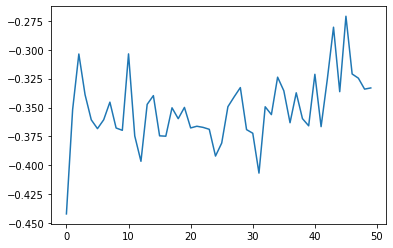

In [32]:
import matplotlib.pyplot as plt 
plt.plot(fitness_tot)

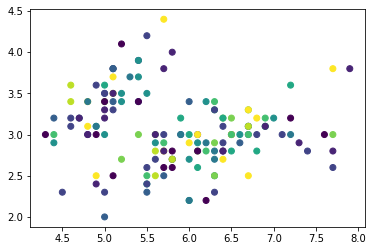

In [50]:
fitness_scores = np.array([fitness(X, individual[:-1]) for individual in population])
best_choice=population[np.argmax(fitness_scores),:]

plt.scatter(X[:,0],X[:,1],c=best_choice[:-1])

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


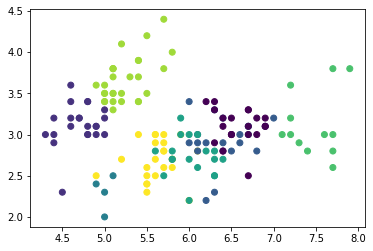

In [59]:
from sklearn.cluster import KMeans
y_kmeans=KMeans().fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_kmeans)


In [62]:
fitness(X,y_kmeans)

0.35974549238457626